## Visualización de HR

**Importación de librerías**

In [32]:
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd 
import numpy as np

**Lectura del dataframe**

In [33]:
hr = pd.read_csv('HRDataset_v14.csv')
hr.head(11)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [34]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [35]:
hr.DateofTermination.isna().sum().sum()

207

In [36]:
hr.ManagerID.isna().sum().sum()

8

In [58]:
# Conversión tipo de dato
hr['LastPerformanceReview_Date'] = pd.to_datetime(hr['LastPerformanceReview_Date']) 
hr['DateofTermination'] = pd.to_datetime(hr['DateofTermination']) 
hr['DOB']=pd.to_datetime(hr['DOB'])

**Estadísticas descriptivas básicas** 

In [37]:
# Media del salario
Mediasalario=round(hr.Salary.mean())

print("La media del salario es",Mediasalario)

La media del salario es 69021


In [38]:
#Mediana del salario
Mediansalario=round(hr.Salary.median())
print("La mediana del salario es",Mediansalario)

La mediana del salario es 62810


In [69]:
#Varianza del salrio
Varsal=np.var(hr.Salary)
Varsal

630821473.6306077

In [71]:
#Desviacón estandar del salario
DStdsalary=round(np.std(hr.Salary),2)
DStdsalary

25116.16

In [41]:
#Salario máximo
Maxsalary= hr['Salary'].max()
Maxsalary

250000

In [40]:
#Moda de fuente de contratación
Modarecsource=hr.RecruitmentSource.mode()
Modarecsource

0    Indeed
Name: RecruitmentSource, dtype: object

In [54]:
#Moda de departamento
Modadept=hr.Department.mode()
Modadept

0    Production       
Name: Department, dtype: object

In [56]:
#Moda de State
Modastate = hr.State.mode()
Modastate

0    MA
Name: State, dtype: object

In [68]:
#Moda de género
Modagen = hr.Sex.mode()
Modagen

0    F
Name: Sex, dtype: object

**Histogramas**

    - Salarios
    - Rangos de salarios más populares

Text(0, 0.5, 'Frecuencia')

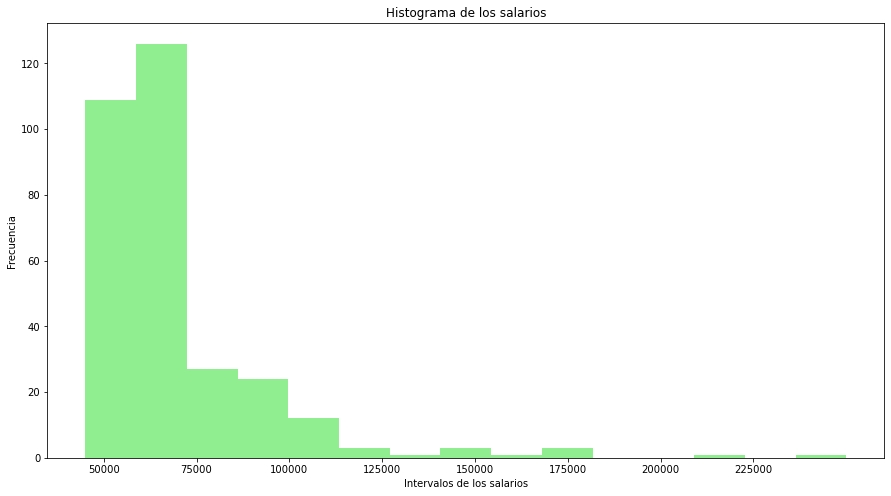

In [67]:
#Salarios
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(hr['Salary'].values.flatten(), bins=15, color='lightgreen')
ax.set_title('Histograma de los salarios')
ax.set(xticks=np.arange(50000, 250000,25000))
ax.set_xlabel('Intervalos de los salarios')
ax.set_ylabel('Frecuencia')

~~~
Se puede observar que los salarios más populares se encuentran entre 45000 y 70000.
~~~~

**Gráfico violín con los salarios, discriminados por géneros**

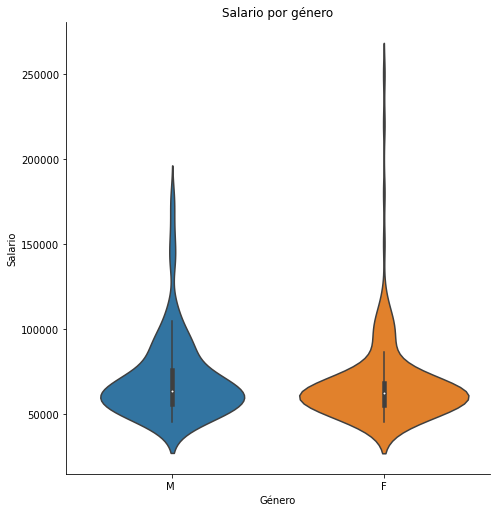

In [43]:
ax = sns.catplot(data= hr, kind='violin', x='Sex', y='Salary', split=True ,height=7)
ax.set(xlabel='Género', ylabel='Salario', title='Salario por género')

**Serie de tiempo correspondiente a la fecha de contratación (Data of Hire)**

In [44]:
hr['DateofHire'] = pd.to_datetime(hr['DateofHire']) 
hr['DateofHire']

0     2011-07-05
1     2015-03-30
2     2011-07-05
3     2008-01-07
4     2011-07-11
         ...    
306   2014-07-07
307   2008-09-02
308   2010-04-10
309   2015-03-30
310   2014-09-29
Name: DateofHire, Length: 311, dtype: datetime64[ns]

In [45]:
empleados =pd.DataFrame(hr.groupby(hr['DateofHire']).count()["Employee_Name"])
empleados

,Employee_Name
DateofHire,
2006-01-09,1
2007-06-25,1
2007-11-05,1
2008-01-07,1
2008-09-02,1
...,...
2017-01-07,1
2017-02-10,1
2017-02-15,2


In [46]:
x=empleados.index
x

DatetimeIndex(['2006-01-09', '2007-06-25', '2007-11-05', '2008-01-07',
               '2008-09-02', '2008-10-27', '2009-01-05', '2009-01-08',
               '2009-04-27', '2009-07-06',
               ...
               '2016-07-04', '2016-07-06', '2016-07-21', '2016-09-06',
               '2016-10-02', '2017-01-07', '2017-02-10', '2017-02-15',
               '2017-04-20', '2018-07-09'],
              dtype='datetime64[ns]', name='DateofHire', length=101, freq=None)

In [47]:
y=empleados.Employee_Name
y

DateofHire
2006-01-09    1
2007-06-25    1
2007-11-05    1
2008-01-07    1
2008-09-02    1
             ..
2017-01-07    1
2017-02-10    1
2017-02-15    2
2017-04-20    2
2018-07-09    1
Name: Employee_Name, Length: 101, dtype: int64

Text(0.5, 1.0, 'Cantidad de empleados contratados por fecha')

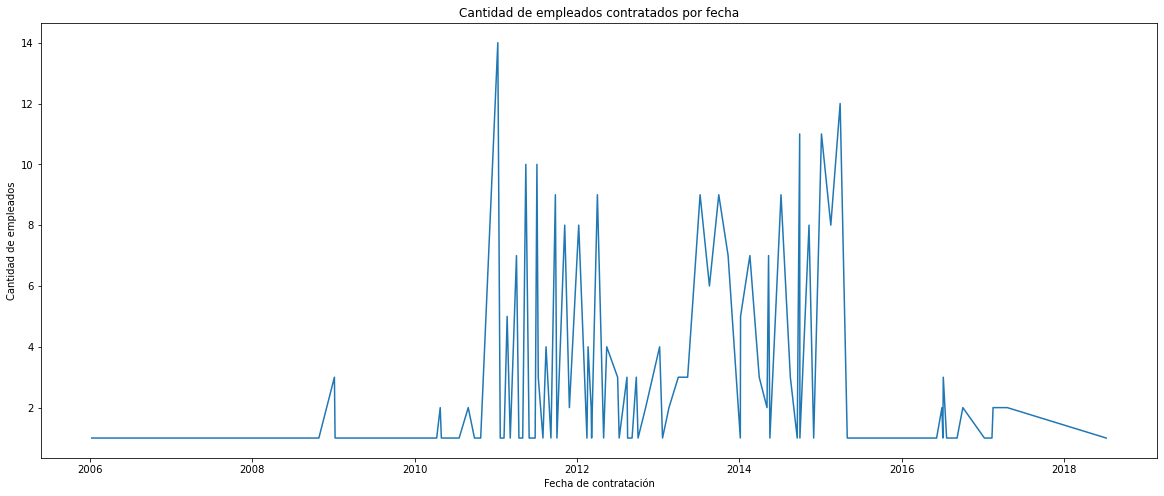

In [60]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, y)
ax.set_xlabel('Fecha de contratación')
ax.set_ylabel('Cantidad de empleados')
ax.set_title('Cantidad de empleados contratados por fecha')